# Multiple Linear Regression

# Bike Sharing Assignment


## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#Importing the libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
# Read the given CSV file

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [4]:
#summary of all the numeric columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No missing values in the dataset

In [7]:
#Renaming the columns
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Data Visualisation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Identify Continuous and Categorical Features

In [11]:
#Checking the unique values in the data
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

### Visualising Numeric Variables

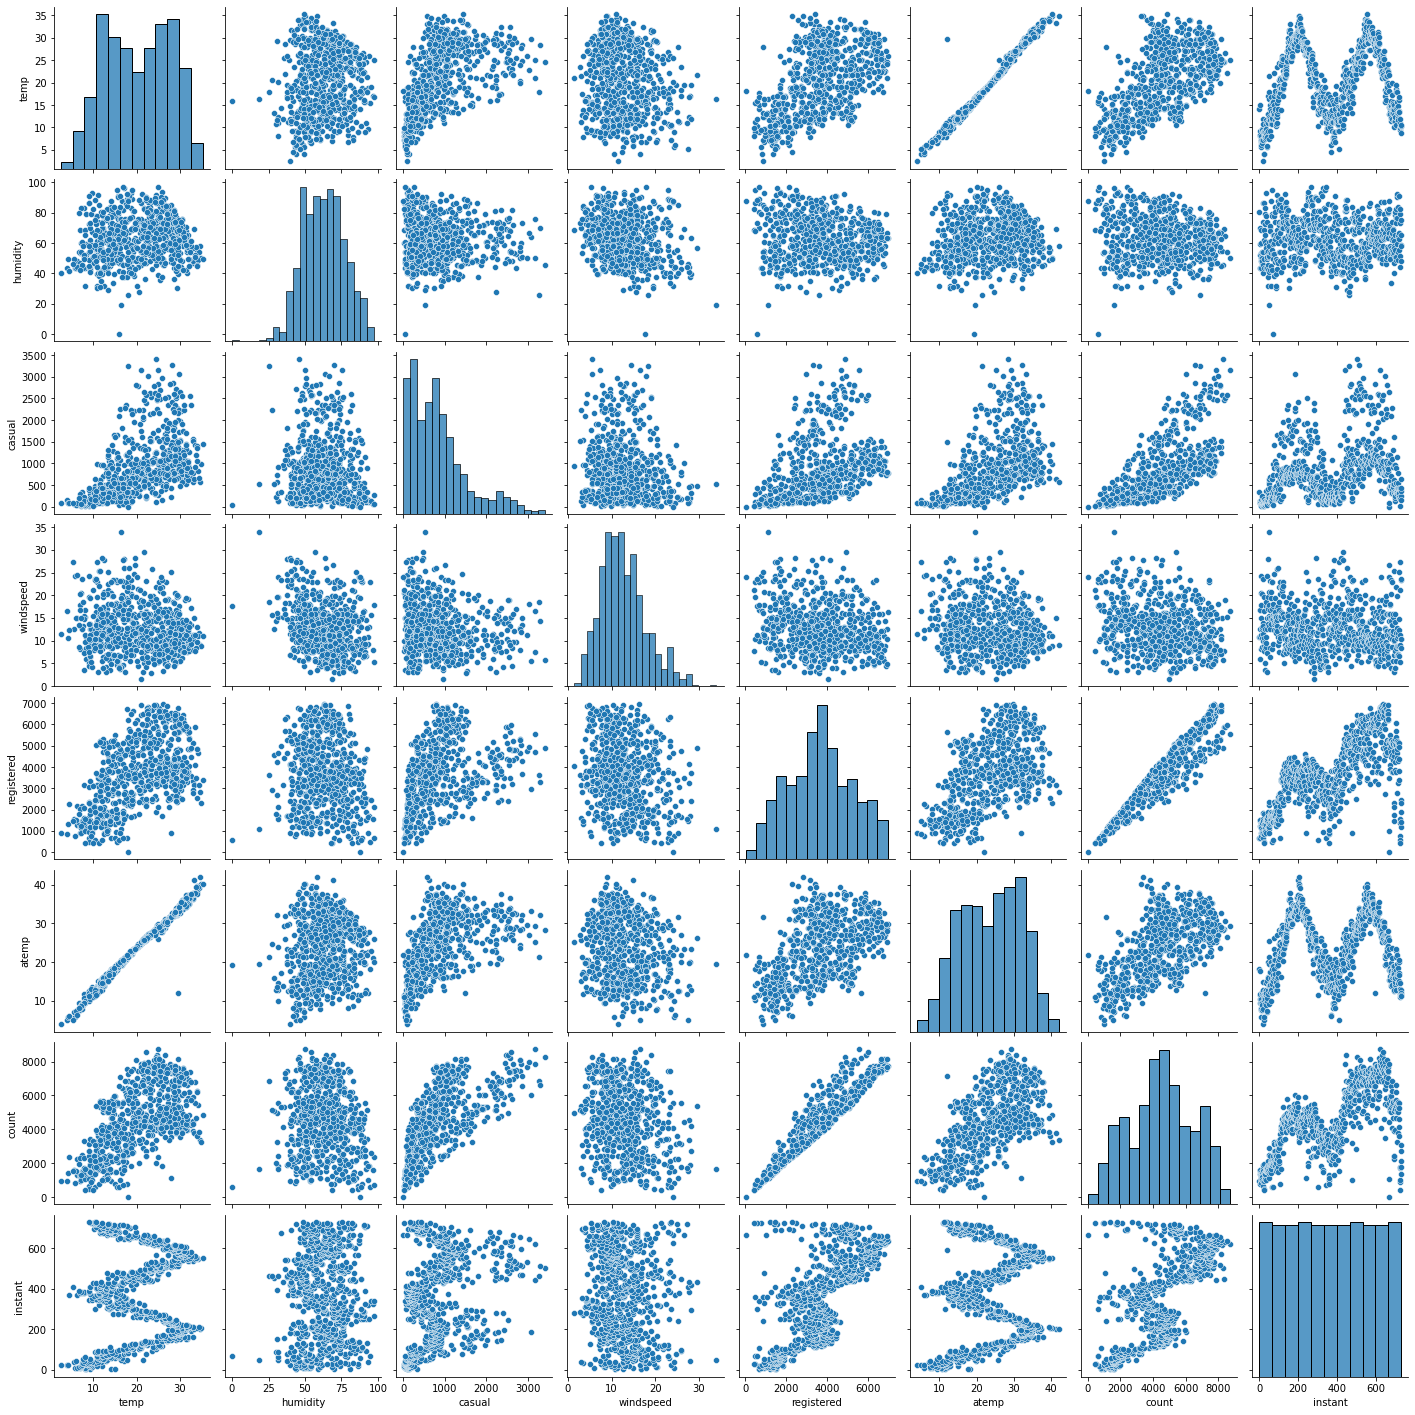

In [12]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

We can see that there are some independent variables look positively correlated to the 'count' variable. 
-  Bike rentals are more correlated to temperature



### Visualising Categorical Variables

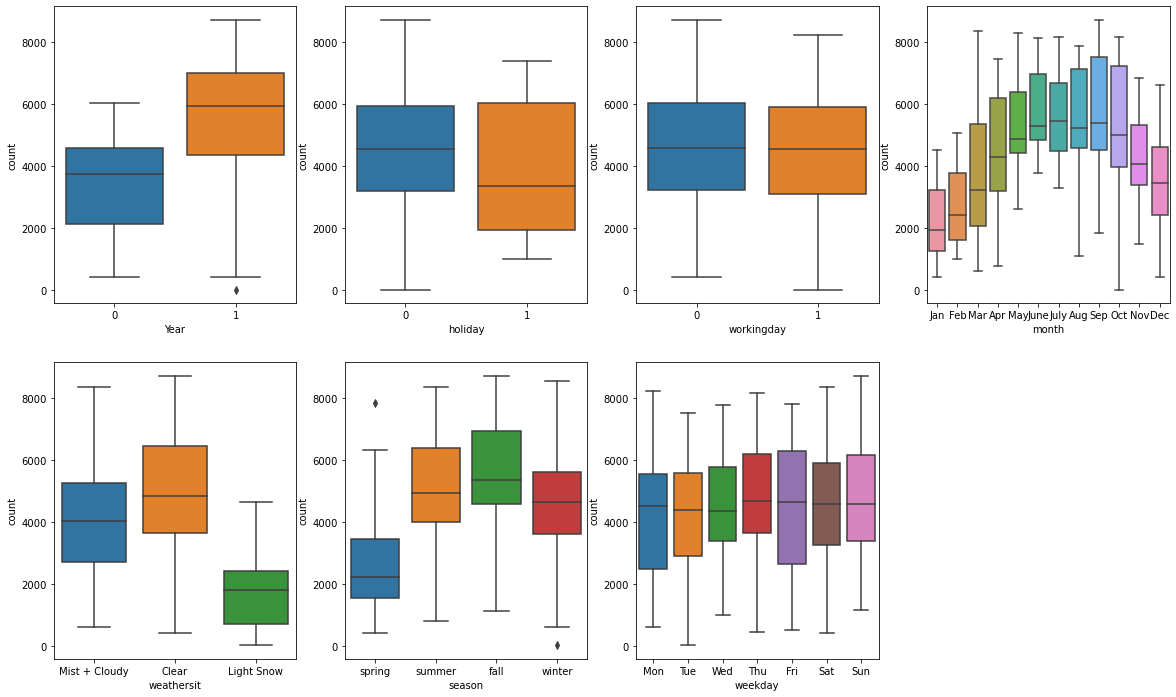

In [13]:
# Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.show()

**Insights:** shows the relationship between categorical variables and a Target variable.  
- Bike Rentals are more :
    -  during the Fall season and then in summer
    -  in the year 2019 compared to 2018
    -  in partly cloudy weather
    -  on Saturday,wednesday and thursday


## Univariate Analysis

#### 1: Season

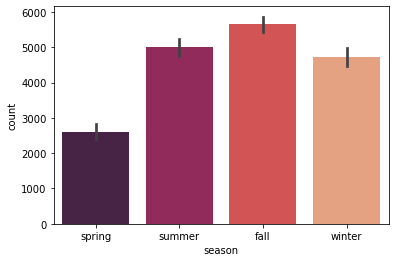

In [14]:
#Relation between season and count of bike rentals

sns.barplot('season','count',data=bike,palette="rocket",)
plt.show()

##### Bike Rentals are more during the Fall season and then in summer

#### 2: Weathersit

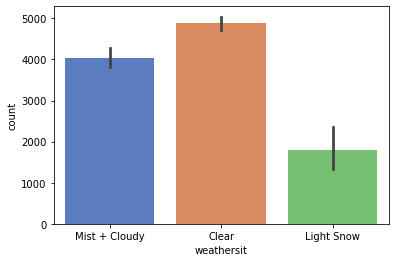

In [15]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',palette="muted",data=bike)
plt.show()

##### Bike Rentals are more in partly cloudy weather

#### 3: Year

##### year (0: 2018, 1:2019)

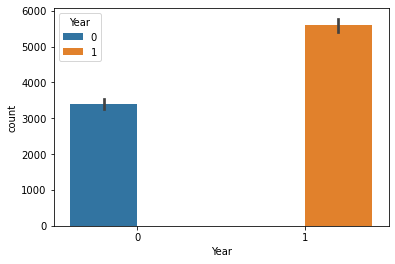

In [17]:
#Relation between Year and count of bike rentals
sns.barplot('Year','count',hue ='Year', data=bike)
plt.show()

##### Bike rentals are more in the year 2019 compared to 2018

#### 4: Month

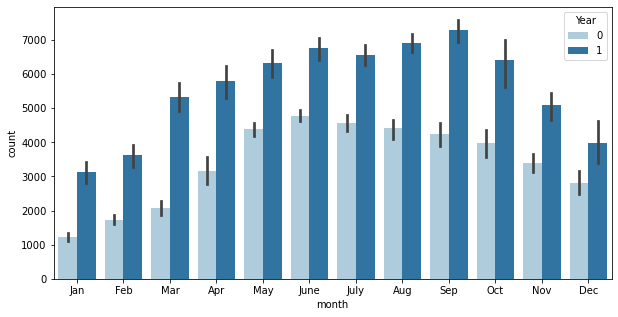

In [18]:
#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=bike,palette='Paired')
plt.show()

##### Bike Rentals are more in the year 2019 compared to 2018

#### 5: Temperature

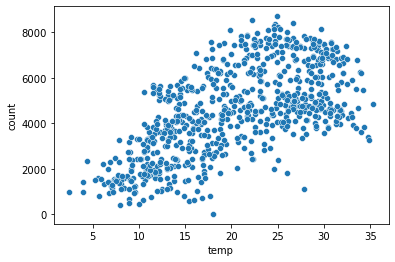

In [19]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()

##### Bike Rentals are observed at higher temperatures

#### 6: Humidity

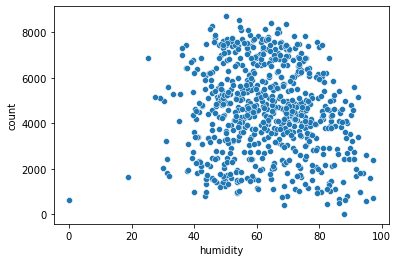

In [20]:
sns.scatterplot(x='humidity', y='count',data=bike)
plt.show()

##### Bike rentals more at high humidity

### Heatmap 

In [21]:
#correlation between variables
bike.corr()

,instant,Year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
instant,1.000000,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
Year,0.866026,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.015171,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,0.150738,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
humidity,0.016080,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


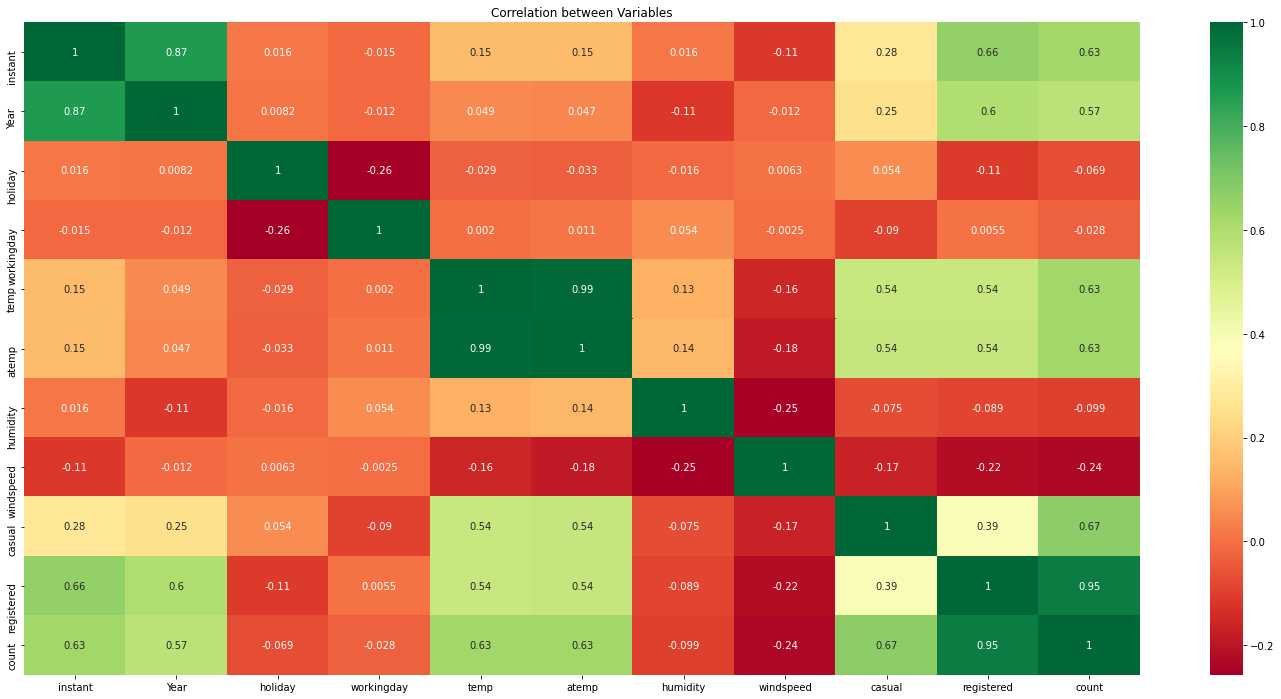

In [22]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

We can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable
- We can also see some other variables are also most correlated.
- Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model
- From this we can Linear Regression Model.

We can see the dataset has some variables that are not required. 
**We can drop instant, dteday, casual, registered**

In [23]:
#drop unnecessary columns

bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Checking the datatypes

In [24]:
#Checking datatypes of all the columns
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## Step 3: Data Preparation

### Creating Dummy variables

In [25]:
#--Dummy variables for month, season, weathersit, weekday)

months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [26]:
# Combining the results to the original bike dataframe

bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [27]:
# Drop 'season','month','weekday','weathersit' 

bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [28]:
#Number of rows and columns
bike.shape

(730, 29)

In [29]:
#Now lets check the correlation between variables again
bike.corr()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
Aug,1.000000e+00,-9.281437e-02,-8.781560e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,-1.742860e-01,-1.768562e-01,-1.730008e-01,8.592246e-18,-0.052432,0.023324,0.354648,0.021580,-0.069125,0.182100
Dec,-9.281437e-02,1.000000e+00,-8.781560e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,7.652343e-02,-1.768562e-01,2.847396e-01,1.091079e-17,0.006363,-0.019189,-0.285664,0.082200,-0.054616,-0.173878
Feb,-8.781560e-02,-8.781560e-02,1.000000e+00,-8.781560e-02,-8.781560e-02,-8.625858e-02,-8.781560e-02,-8.781560e-02,-8.625858e-02,-8.781560e-02,...,5.038592e-01,-1.673311e-01,-1.636834e-01,1.428651e-19,0.011980,-0.007382,-0.310626,-0.130521,0.096093,-0.273848
Jan,-9.281437e-02,-9.281437e-02,-8.781560e-02,1.000000e+00,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,5.325406e-01,-1.768562e-01,-1.730008e-01,-1.363849e-19,0.035760,0.002067,-0.431505,-0.089555,0.062117,-0.367167
July,-9.281437e-02,-9.281437e-02,-8.781560e-02,-9.281437e-02,1.000000e+00,-9.116872e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,-1.742860e-01,-1.768562e-01,-1.730008e-01,-1.363849e-19,0.006363,0.002067,0.432722,-0.063757,-0.096090,0.166236
June,-9.116872e-02,-9.116872e-02,-8.625858e-02,-9.116872e-02,-9.116872e-02,1.000000e+00,-9.116872e-02,-9.116872e-02,-8.955224e-02,-9.116872e-02,...,-1.711958e-01,2.857575e-01,-1.699334e-01,-4.983560e-18,-0.051502,-0.004581,0.308314,-0.109048,-0.019624,0.195568
Mar,-9.281437e-02,-9.281437e-02,-8.781560e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,1.000000e+00,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,2.817311e-01,7.211912e-02,-1.730008e-01,-1.363849e-19,-0.052432,0.002067,-0.174923,-0.083887,0.126575,-0.128456
May,-9.281437e-02,-9.281437e-02,-8.781560e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,1.000000e+00,-9.116872e-02,-9.281437e-02,...,-1.742860e-01,5.248014e-01,-1.730008e-01,-1.363849e-19,0.006363,0.012696,0.165188,0.131273,-0.029534,0.132553
Nov,-9.116872e-02,-9.116872e-02,-8.625858e-02,-9.116872e-02,-9.116872e-02,-8.955224e-02,-9.116872e-02,-9.116872e-02,1.000000e+00,-9.116872e-02,...,-1.711958e-01,-1.737204e-01,5.269844e-01,-7.198476e-18,0.067852,-0.004581,-0.206690,-0.005837,-0.025873,-0.040344
Oct,-9.281437e-02,-9.281437e-02,-8.781560e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,1.000000e+00,...,-1.742860e-01,-1.768562e-01,5.364968e-01,8.592246e-18,0.006363,0.012696,-0.017616,0.141557,-0.060133,0.108846


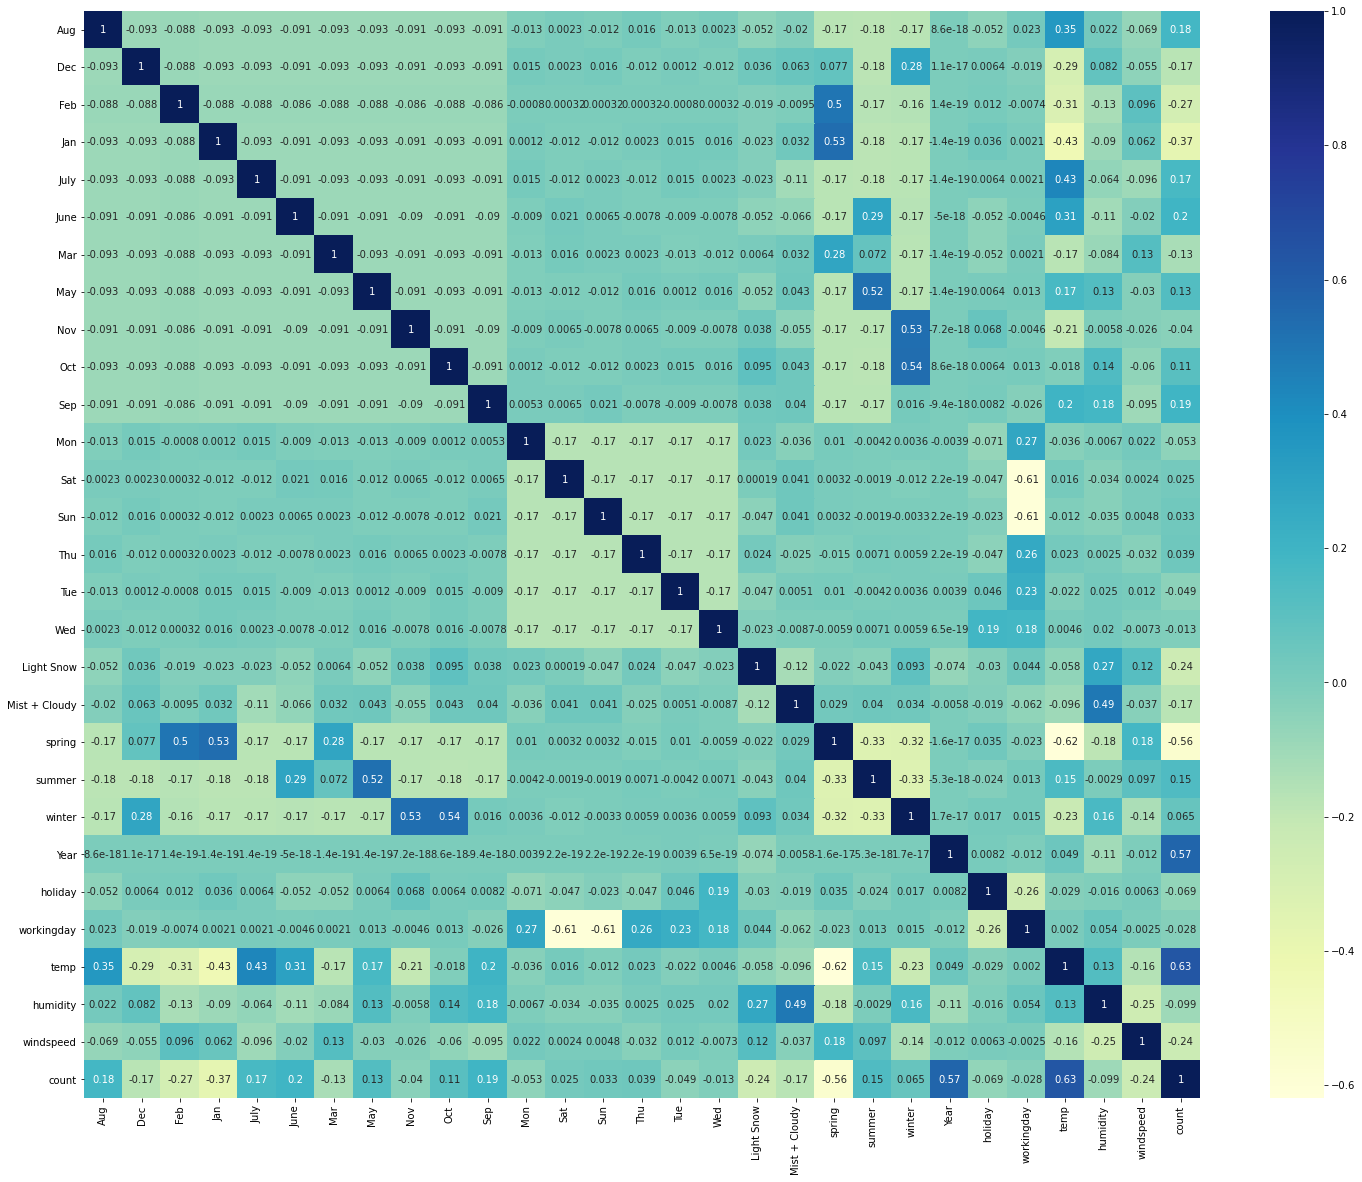

In [30]:
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

Temperature,Summer season,June to october months are in good correlation with the 'count' variable & seem to have good influence on the number of bike rentals.

## Step 4: Splitting the Data into Training and Testing Sets

Before model building, you first need to perform the test-train split and scale the features.

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [32]:
#Rows and columns after split

print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features

It is important to have all the variables on the same scale for the model to be easily interpretable. 
We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 
- **There are two common ways of rescaling:**

- Min-Max scaling (Normalisation):Between 0 and 1
- Standardisation :mean-0, sigma-1


##### Min-Max scaling

In [33]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [34]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [35]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1

Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors

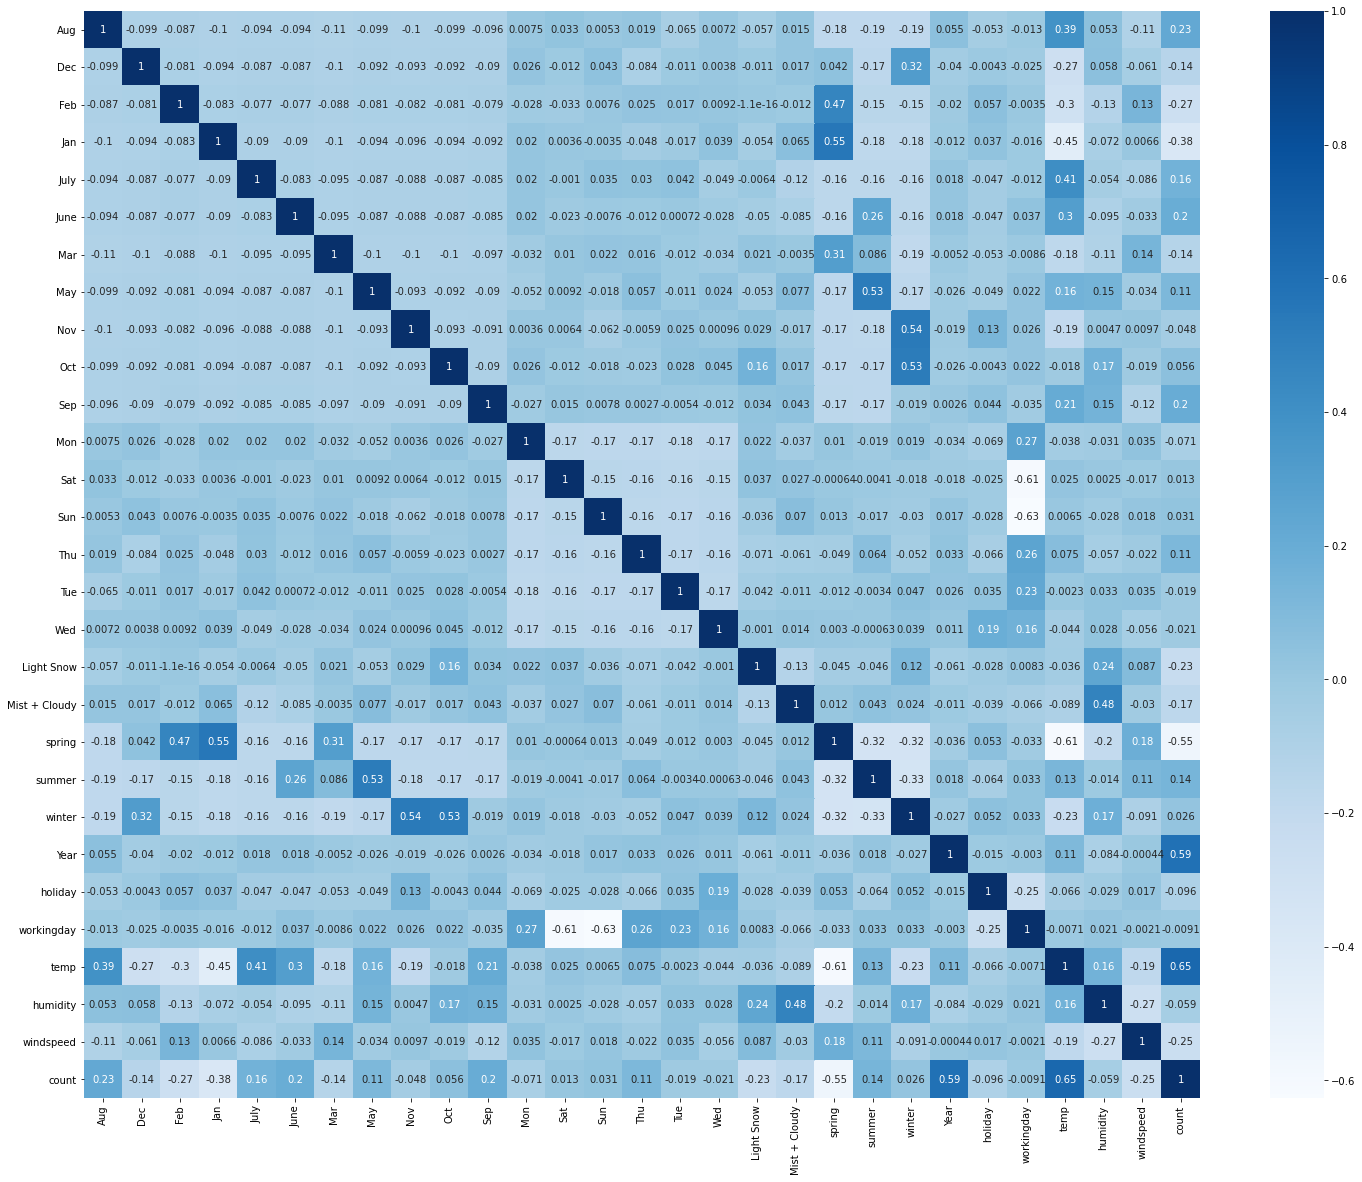

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='Blues',annot = True)
plt.show()

From the heatmap we can see temp, year is  correlated to the 'count' variable. Even in August, September months we can see the counts are little high.


#### Dividing into X and Y sets for the model building

In [37]:
#Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

## Step 5: Building a linear model


We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE **Recursive Feature Elimination**

In [38]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [41]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [42]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

### Building model using statsmodel

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          8.15e-189
Time:                        13:49:11   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
Year              0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
humidity         -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [47]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.85
1,Jan,1.75


**January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped**

In [49]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

##### Rebuilding the model without 'Jan'

In [50]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.0
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          9.86e-189
Time:                        13:49:51   Log-Likelihood:                 511.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     495   BIC:                            -929.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3002      0.035      8.499      0.000       0.231       0.370
Dec              -0.0248      0.017     -1.456      0.146      -0.058       0.009
July             -0.0574      0.018     -3.137      0.002      -0.093      -0.021
Nov              -0.0329      0.019     -1.755      0.080      -0.070       0.004
Sep               0.0777      0.017      4.583      0.000       0.044       0.111
Light Snow       -0.2418      0.026     -9.134      0.000      -0.294      -0.190
Mist + Cloudy    -0.0539      0.011     -5.132      0.000      -0.075      -0.033
spring           -0.0649      0.021     -3.049      0.002      -0.107      -0.023
summer            0.0476      0.015      3.125      0.002       0.018       0.078
winter            0.1072      0.018      5.963      0.000       0.072       0.142
Year              0.2294      0.008     28.268      0.000       0.213       0.245
holiday          -0.0923      0.026     -3.588      0.000      -0.143      -0.042
temp              0.5103      0.035     14.509      0.000       0.441       0.579
humidity         -0.1699      0.038     -4.489      0.000      -0.244      -0.096
windspeed        -0.1816      0.026     -7.053      0.000      -0.232      -0.131
==============================================================================
Omnibus:                       63.130   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.275
Skew:                          -0.650   Prob(JB):                     1.42e-33
Kurtosis:                       5.330   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [52]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.30
11,temp,16.75
13,windspeed,4.72
8,winter,4.06
6,spring,4.04
7,summer,2.81
5,Mist + Cloudy,2.31
9,Year,2.08
2,Nov,1.83
1,July,1.59


**'humidity' variable can be dropped as its insignificant by looking at very high  VIF**

##### Rebuilding the model without 'humidity'

In [53]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [54]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.29e-185
Time:                        13:50:17   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2183      0.031      7.082      0.000       0.158       0.279
Dec              -0.0308      0.017     -1.782      0.075      -0.065       0.003
July             -0.0523      0.019     -2.808      0.005      -0.089      -0.016
Nov              -0.0328      0.019     -1.718      0.086      -0.070       0.005
Sep               0.0709      0.017      4.123      0.000       0.037       0.105
Light Snow       -0.2888      0.025    -11.656      0.000      -0.337      -0.240
Mist + Cloudy    -0.0810      0.009     -9.255      0.000      -0.098      -0.064
spring           -0.0761      0.022     -3.529      0.000      -0.118      -0.034
summer            0.0406      0.015      2.630      0.009       0.010       0.071
winter            0.0921      0.018      5.121      0.000       0.057       0.127
Year              0.2336      0.008     28.418      0.000       0.217       0.250
holiday          -0.0932      0.026     -3.556      0.000      -0.145      -0.042
temp              0.4698      0.035     13.561      0.000       0.402       0.538
windspeed        -0.1486      0.025     -5.908      0.000      -0.198      -0.099
==============================================================================
Omnibus:                       66.012   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.015
Skew:                          -0.672   Prob(JB):                     1.09e-35
Kurtosis:                       5.402   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.12
12,windspeed,4.65
8,winter,2.91
7,summer,2.23
6,spring,2.13
9,Year,2.07
2,Nov,1.81
1,July,1.59
5,Mist + Cloudy,1.55
0,Dec,1.42


**Holiday variable seems to be insignificant, by looking at p value and low  VIF. We can drop it**

##### Rebuliding the model without holiday

In [57]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [58]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.0
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          4.39e-184
Time:                        13:50:39   Log-Likelihood:                 494.65
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     497   BIC:                            -908.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2186      0.031      7.010      0.000       0.157       0.280
Dec              -0.0317      0.017     -1.810      0.071      -0.066       0.003
July             -0.0513      0.019     -2.726      0.007      -0.088      -0.014
Nov              -0.0408      0.019     -2.126      0.034      -0.079      -0.003
Sep               0.0667      0.017      3.842      0.000       0.033       0.101
Light Snow       -0.2855      0.025    -11.397      0.000      -0.335      -0.236
Mist + Cloudy    -0.0796      0.009     -8.996      0.000      -0.097      -0.062
spring           -0.0799      0.022     -3.668      0.000      -0.123      -0.037
summer            0.0402      0.016      2.569      0.010       0.009       0.071
winter            0.0916      0.018      5.030      0.000       0.056       0.127
Year              0.2339      0.008     28.138      0.000       0.218       0.250
temp              0.4681      0.035     13.357      0.000       0.399       0.537
windspeed        -0.1496      0.025     -5.880      0.000      -0.200      -0.100
==============================================================================
Omnibus:                       75.448   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.473
Skew:                          -0.745   Prob(JB):                     5.90e-43
Kurtosis:                       5.633   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [60]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.12
11,windspeed,4.65
8,winter,2.91
7,summer,2.23
6,spring,2.12
9,Year,2.07
2,Nov,1.78
1,July,1.58
5,Mist + Cloudy,1.55
0,Dec,1.42


**Windspeed seems to be insignificant,by looking at  high VIF and negative correlation with count.  Lets drop it**

##### Rebuilding the model without windspeed

In [61]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [62]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          5.03e-178
Time:                        13:51:02   Log-Likelihood:                 477.50
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     498   BIC:                            -880.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1681      0.031      5.428      0.000       0.107       0.229
Dec              -0.0263      0.018     -1.455      0.146      -0.062       0.009
July             -0.0517      0.019     -2.656      0.008      -0.090      -0.013
Nov              -0.0451      0.020     -2.275      0.023      -0.084      -0.006
Sep               0.0710      0.018      3.958      0.000       0.036       0.106
Light Snow       -0.3001      0.026    -11.653      0.000      -0.351      -0.249
Mist + Cloudy    -0.0779      0.009     -8.526      0.000      -0.096      -0.060
spring           -0.0898      0.022     -4.000      0.000      -0.134      -0.046
summer            0.0303      0.016      1.889      0.059      -0.001       0.062
winter            0.0931      0.019      4.949      0.000       0.056       0.130
Year              0.2330      0.009     27.132      0.000       0.216       0.250
temp              0.4809      0.036     13.307      0.000       0.410       0.552
==============================================================================
Omnibus:                       77.427   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.686
Skew:                          -0.755   Prob(JB):                     3.57e-45
Kurtosis:                       5.712   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [64]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.22
8,winter,2.77
9,Year,2.06
7,summer,1.94
2,Nov,1.76
1,July,1.58
5,Mist + Cloudy,1.55
6,spring,1.43
0,Dec,1.42
3,Sep,1.34


**July column can be dropped due to its p value and low VIF**

##### Rebuilding the model without July

In [65]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [66]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.07e-177
Time:                        13:51:31   Log-Likelihood:                 473.92
No. Observations:                 510   AIC:                            -925.8
Df Residuals:                     499   BIC:                            -879.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1594      0.031      5.145      0.000       0.099       0.220
Dec              -0.0263      0.018     -1.447      0.149      -0.062       0.009
Nov              -0.0445      0.020     -2.230      0.026      -0.084      -0.005
Sep               0.0851      0.017      4.942      0.000       0.051       0.119
Light Snow       -0.3009      0.026    -11.617      0.000      -0.352      -0.250
Mist + Cloudy    -0.0765      0.009     -8.335      0.000      -0.094      -0.058
spring           -0.0780      0.022     -3.523      0.000      -0.121      -0.034
summer            0.0459      0.015      3.047      0.002       0.016       0.075
winter            0.1056      0.018      5.766      0.000       0.070       0.142
Year              0.2336      0.009     27.041      0.000       0.217       0.251
temp              0.4679      0.036     12.989      0.000       0.397       0.539
==============================================================================
Omnibus:                       78.643   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.724
Skew:                          -0.775   Prob(JB):                     9.53e-45
Kurtosis:                       5.672   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [68]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,2.89
7,winter,2.61
8,Year,2.06
1,Nov,1.76
6,summer,1.63
4,Mist + Cloudy,1.55
0,Dec,1.42
5,spring,1.36
2,Sep,1.24
3,Light Snow,1.07


##### Finally we have our model ! The VIFs and p-values both are within an acceptable range. 
##### So we go ahead and make our predictions using this model only.



**- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.**

**-  A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression**

**- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.826 or 82.6%**

**- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.82 or 82%**

#### So our model is lm5 which is obtained by removing January, windspeed, holiday, July and humidity variables from the RFE support columns**

## Step 6: Residual Analysis of the train data
 
#### Let's checck the assumpitions of Linear Regression.
 

In [69]:
#X_train_lm5=sm.add_constant(X_train_lm5)
#X_train_lm5.columns
X_train_lm5

,const,Dec,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp
576,1.0,0,0,0,0,0,0,0,0,1,0.815169
426,1.0,0,0,0,0,1,1,0,0,1,0.442393
728,1.0,1,0,0,0,0,1,0,0,1,0.245101
482,1.0,0,0,0,0,1,0,1,0,1,0.395666
111,1.0,0,0,0,0,1,0,1,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,0.863973
53,1.0,0,0,0,0,0,1,0,0,0,0.202618
350,1.0,1,0,0,0,1,0,0,1,0,0.248216
79,1.0,0,0,0,0,1,0,1,0,0,0.462664


In [70]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 432x288 with 0 Axes>

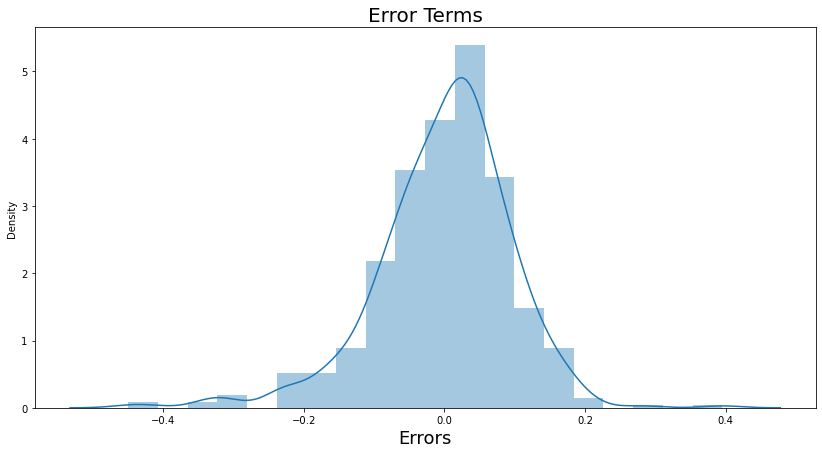

In [72]:
# Plot the histogram of the error terms

fig = plt.figure()

plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)

plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

**We can see Error terms are normally distributed**

## Step 7: Making Predictions

#### Applying the scaling on the test sets

In [73]:
#Create a list of numeric variables

num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [74]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [75]:
#Columns
X_train_new5.columns

Index(['Dec', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'temp'],
      dtype='object')

In [76]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Dec,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp
184,1.0,0,0,0,0,1,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,1,0,1,0.901354
299,1.0,0,0,0,0,1,0,0,1,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,1,0,0,0.817246


In [78]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test set

In [79]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8158795007526897

In [80]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

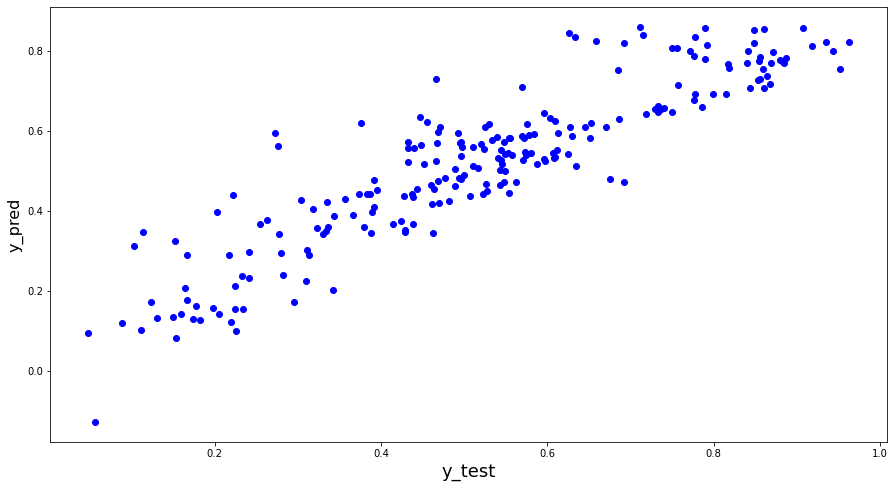

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### Visualising the fit on the test set

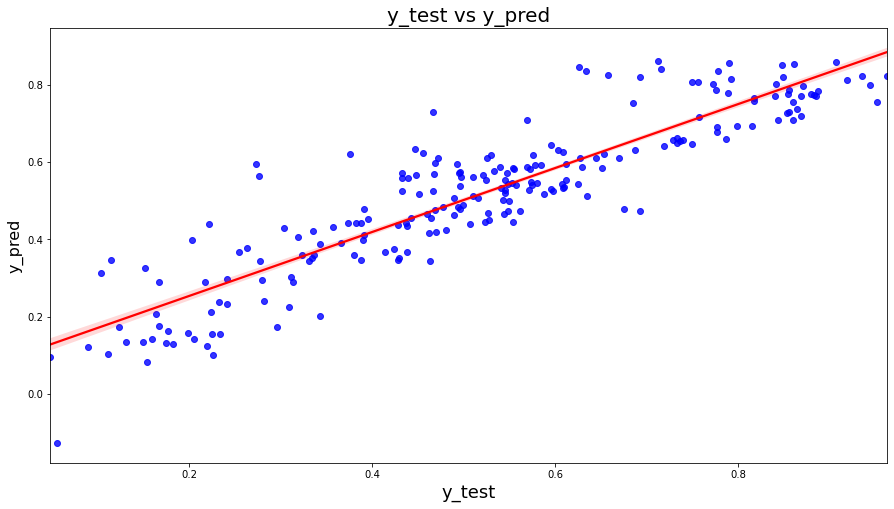

In [82]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()


We can see that the equation of our best fitted line is:

$ count=         0.4914 \times temp+   0.0916   \times September + 0.0645 \times Saturday +0.0527 \times summer + 0.0970 \times winter + 0.2334 \times Year + 0.0566 \times working day   - 0.03041 \times light snow - 0.0786 \times mist cloudy -0.065 \times spring $

### Analysis  Comparison between Train model and Test: 

#### - Train  - R^2 :  0.826

#### - Train  - Adjusted R^2 : 0.82

#### - Test  - R^2: 0.8115

#### - Test -  Adjusted R^2: 0.790564

#### - Difference in R^2 between train and test: 1.5%

#### - Difference in adjusted R^2 between Train and test: 3.15% 

##### Since adusted R^2 is less than which is less than 5% difference in R62, we can conclude that it is the best model



# Analysis on the problem:

#### -  We can see that temperature variable is having the highest coefficient 0.4914, which means if the temperature increases by one unit the number of bike rentals increases by 0.4914 units.

#### We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. 

#### We have spring, mist cloudy , light snow variables with negative coefficient.  The coefficient value signifies how much of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

# Business Goals:

#### -  Temperature could be a prime factor for making decision for the Organisation

#### -  We can see demand for bikes was more in 2019 than 2018

#### - Working days as they have good influence on bike rentals. So it would be great to provide offers to the working individuals
